# Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import f

In [2]:
df = pd.read_csv('HW2_data.csv')
print(df.shape)
df.head()

(30, 4)


,y,x1,x2,x3
0,-1.471961,1,-0.626454,-0.383425
1,4.585642,1,1.595281,1.215549
2,3.113337,1,0.487429,0.562698
3,1.018829,1,-0.305388,0.239762
4,-0.216829,1,-0.621241,-1.099278


Use the provided data set to build a multiple linear regression model

$$\large y = X \beta + \sigma \epsilon $$

1) Find the estimator $\hat\beta = (\hat{\beta_1}, \hat{\beta_2}, \hat{\beta_3})$ and the distribution of  $\hat{\beta_3}$

In [3]:
x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()
x3 = df['x3'].to_numpy()
y = df['y'].to_numpy()

# Get X Matrix
X = np.stack((x1,x2,x3), axis=1)

$$\large \hat \beta = (X^{T} X)^{-1}X^T y $$

In [4]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
b1, b2, b3 = beta_hat
b1, b2, b3

(0.9925764865075013, 2.0805342305653247, 0.7053498780401117)

$$\large Cov \hat \beta = \sigma^2(X^{T} X)^{-1}$$

$$\large \sigma^2 = \dfrac{1}{n-p} \hat \epsilon'\hat \epsilon$$

$$\large \hat \epsilon = y_i - \hat y_i$$

In [5]:
# Covariance as a function of sigma^2
COV_beta_hat = np.linalg.inv(X.T @ X)
COV_beta_hat

array([[ 0.03605075,  0.00886407, -0.02331968],
       [ 0.00886407,  0.30290927, -0.37437606],
       [-0.02331968, -0.37437606,  0.52489867]])

$$\large Cov \text{ } \hat \beta_3 = 0.524 \text{ } \sigma^2  $$

2) Perform an F–test for the hypothesis $H_o : \beta_3 = 0$ with the $\alpha = 0.01$ level
of significance. Provide the value of the F test statistic and the corresponding critical
value.

In [6]:
def get_H_matrix(X):
    return X @ np.linalg.inv(X.T @ X) @ X.T

H_full = get_H_matrix(X)
SS_full = y.T @ (np.identity(H_full.shape[0]) - H_full) @ y
SS_full

19.013416291904456

Fit the reduced linear model only use β1 and β2, and compute the reduced residual sum of squares.

In [7]:
X_red = X[:, :-1]
H_red = get_H_matrix(X_red)
SS_red = y.T @ (np.identity(H_red.shape[0]) - H_red) @ y
SS_red

19.961253417440183

In [8]:
n = X.shape[0]
p = X.shape[1]
q = X_red.shape[1] 
F_stat = ((SS_red - SS_full) / (p-q)) / (SS_full/(n-p))
F_stat

1.3459760201201216

$$F_{p-q, n-p} $$

In [9]:
f_statistic = f.isf(0.01,p-q,n-p)
f_statistic

7.676684048887484

$$ F _{critical} > F_{stat} \text{ Do not Reject } H_o$$

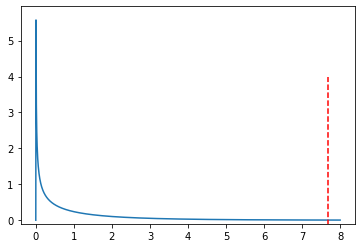

In [10]:
fig, ax = plt.subplots(1, 1)
xArr = np.arange(0,8,0.005)
yArr = f.pdf(xArr, p-q, n-p)
yArr[np.isinf(yArr)] = 0
ax.plot(xArr, yArr)
ax.vlines(x = f_statistic, ymin = -2, ymax = 4,  colors='red', linestyles='dashed')
ax.set_ylim(-0.10)
plt.show()

3) Use the marginal distribution of $\beta_3$ to conduct a t–test for the hypothesis $H_o : \beta_3 = 0$ with the $\alpha = 0.01$ level
of significance. Provide the value of the test
statistic and the p value.


$$\large \hat \beta_3 \sim N(\beta_3, \sigma^2 C_j)  $$

$$\large C_j = (X^T X)^{-1}_{jj} $$

In [11]:
# Calculate Sum of Suares
# Option 1 using H-matrix
H_full = get_H_matrix(X)
SS_full = y.T @ (np.identity(H_full.shape[0]) - H_full) @ y
print(SS_full)

# Option 2 - Sum of Squares
ei = y - X @ beta_hat
SS_full = np.dot(ei, ei)
print(SS_full)

# Simga^2
sigma_2 = SS_full / ( n-p) 

#Cj 
Cj = COV_beta_hat[-1,-1]
print(Cj)

19.013416291904456
19.01341629190452
0.5248986740944783


$\sigma^2$ unknown so T-distribution

In [12]:
b3 = beta_hat[-1]
b_null = 0
t = (b3 - b_null) / np.sqrt(sigma_2*Cj)
p = 2 * (1 - stats.t.cdf(abs(t), df = 30 - 3 ))
p

0.25613909746903474

In [13]:
p = 2 * (1 - stats.t.cdf(abs(t), df = 30 - 3 ))
p

0.25613909746903474

$$ p > alpha \text{ Do not Reject } H_o
$$

4) Compute the leverage score for the first and second observations. Which data
point is more influential? What is the issue arise with a very high leverage value.

In [16]:
H_full = get_H_matrix(X)

The *leverage score* for the i th observation is given by
$h_{ii}$ the i th diagonal element of H.

In [17]:
H_full.shape

(30, 30)

In [18]:
print('Leverage score for the first observation = ', H_full[0,0] )
print('Leverage score for the second observation = ', H_full[1,1] )

Leverage score for the first observation =  0.05902166122567102
Leverage score for the second observation =  0.10215207937505952


A higher leverage score suggests the point is influential in that the variance of the
residual is small and hence the fitted curve will pass through close to the point regardless
of other observation

(5) Given a new data point x = (1, 0.12, 0.56), find the predicted y value and its
95% confidence interval.

In [30]:
x_vector = np.array([1, 0.12, 0.56])
y_pred = x_vector @ beta_hat
y_pred

1.6372365258778028

$\sigma^2$ unknown so T-distribution

In [27]:
# Option 2 - Sum of Squares
ei = y - X @ beta_hat
SS_full = np.dot(ei, ei)

# Simga^2
sigma_2 = SS_full / (30-3)
print(sigma_2)

0.7042006034038711


$$ Var \text{  } y_{pred} = \sigma^2 x' (X^T X)^{-1}x $$

In [38]:
var_y_pred = sigma_2 * (x_vector.T @ np.linalg.inv(X.T @ X) @ x_vector)
var_y_pred

0.0920489193070928

In [41]:
ME = abs(stats.t.isf(0.975, df = 30 - 3 )) * np.sqrt(var_y_pred) # margin of error
ME

0.622516449410153

$$ y_{pred} \pm 0.622$$

$$ (1.01, 2.26) $$